<a href="https://colab.research.google.com/github/easywater4528/python-matplot/blob/main/2025319856_%EC%9D%B4%EC%A7%80%EC%88%98_%EB%8D%B0%EC%9D%B4%ED%84%B0%ED%83%90%EC%83%89%EC%8B%A4%EC%8A%B53.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import kagglehub
import os
# Download latest version
path = kagglehub.dataset_download("jainaru/world-happiness-report-2024-yearly-updated")

csv_file_path = os.path.join(path, 'World-happiness-report-2024.csv')

data = pd.read_csv(csv_file_path)

# 제거할 열 목록
drop_cols = ['Regional indicator', 'upperwhisker', 'lowerwhisker', 'Dystopia + residual']

# 제거
data = data.drop(columns=drop_cols)

# 열 이름 바꾸기
data = data.rename(columns={
    'Country name': 'country',
    'Ladder score': 'happy_score',
    'Log GDP per capita': 'gdp',
    'Social support': 'social_support',
    'Healthy life expectancy': 'health',
    'Freedom to make life choices': 'freedom',
    'Generosity': 'generosity',
    'Perceptions of corruption': 'corruption'
})


display(data.head())

Using Colab cache for faster access to the 'world-happiness-report-2024-yearly-updated' dataset.


,country,happy_score,gdp,social_support,health,freedom,generosity,corruption
0,Finland,7.741,1.844,1.572,0.695,0.859,0.142,0.546
1,Denmark,7.583,1.908,1.520,0.699,0.823,0.204,0.548
2,Iceland,7.525,1.881,1.617,0.718,0.819,0.258,0.182
3,Sweden,7.344,1.878,1.501,0.724,0.838,0.221,0.524
4,Israel,7.341,1.803,1.513,0.740,0.641,0.153,0.193


In [ ]:
print( data.duplicated().sum() ) # 중복데이터 체크
print( data.isnull().sum() ) # 결측 데이터 체크

0
country           0
happy_score       0
gdp               3
social_support    3
health            3
freedom           3
generosity        3
corruption        3
dtype: int64


In [ ]:
data = data.dropna()
data.drop(['country'],axis=1, inplace=True)

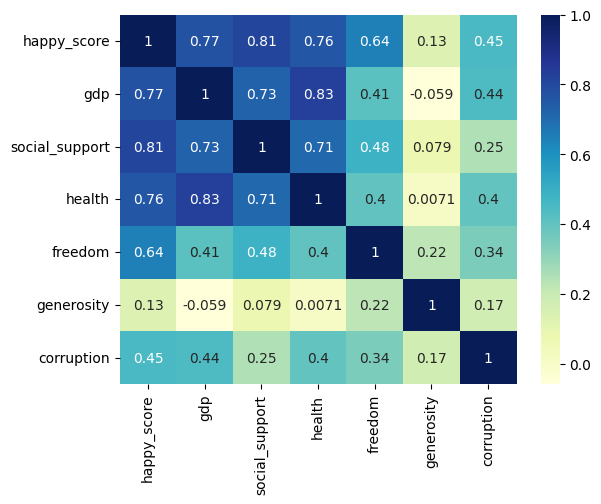

In [ ]:
corr_res = data.corr()
sns.heatmap(corr_res, annot=True, cmap='YlGnBu')
plt.show()

happy_score


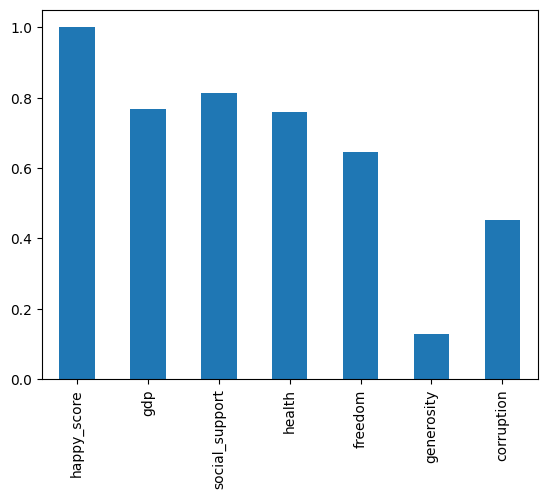

In [ ]:
input_corr = input()
corr_res.loc[input_corr].plot.bar()
plt.show()

In [ ]:
nums = data.shape[0]
# 행복지수로 정렬되어 있으므로 1/3 지점, 2/3 지점의
# 행복지수 값을 가져옴
# 참고로 pd.qcut() method를 활용해도 같은 결과를 얻을 수 있음 (중복데이터가 없고, 행복지수로 정렬되어 있기 때문)
h_border = data.iloc[ int(nums/3) ]['happy_score']
m_border = data.iloc[ int(nums/3) * 2 ]['happy_score']

print(h_border, m_border)

6.195 5.106


In [ ]:
# 함수 정의
def encoding_group_rank(x):
  if x >= h_border:
    return 'H'
  elif x >= m_border:
    return 'M'
  else:
    return 'L'

In [ ]:
data['group_rank'] = data['happy_score'].apply(encoding_group_rank)

In [ ]:
data.groupby('group_rank').mean().sort_values('happy_score', ascending=False)

,happy_score,gdp,social_support,health,freedom,generosity,corruption
group_rank,,,,,,,
H,6.741553,1.749553,1.398596,0.648723,0.728617,0.161277,0.248043
M,5.706326,1.402565,1.223565,0.553478,0.634674,0.128261,0.102739
L,4.148532,0.984809,0.782723,0.361149,0.498872,0.148894,0.110489


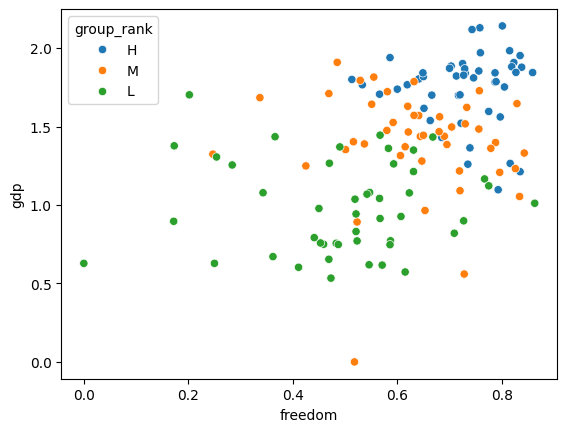

In [ ]:
# 그래프 분석
sns.scatterplot(x='freedom', y='gdp', hue='group_rank', data=data)
plt.show()

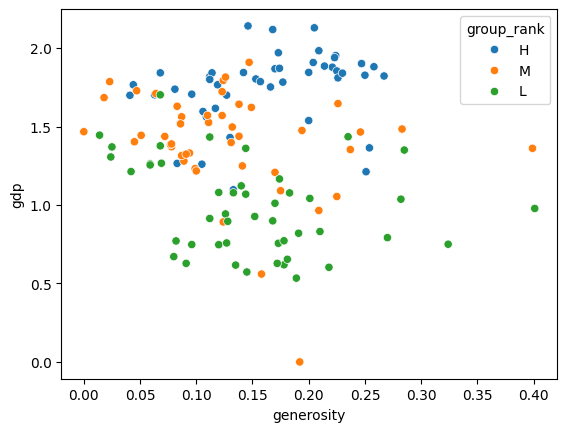

In [ ]:
# 그래프 분석
sns.scatterplot(x='generosity', y='gdp', hue='group_rank', data=data)
plt.show()